In [3]:
##############################################################
#### PART 4A. Continued                   ####################
######    Anxiety and Happiness Regression    ###############
#############################
#############################################################

In [ ]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn import linear_model, datasets
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import numpy as np
import matplotlib as mlp
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [4]:
happy = pd.read_csv('weather_happy.csv')
anxiety = pd.read_csv('weather_anxiety.csv')

In [5]:
happy.drop('Unnamed: 0', axis=1, inplace=True)
anxiety.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
happy_anxiety = pd.merge(happy, anxiety,left_index=True,right_index=True, how='left')

In [7]:
happy_anxiety.head()

,Stations_x,Tmax,Tmin,AF,Rain,Sun,Tmean,Stations_y,Latitude,Longtitude,...,Longtitude_x,Location_y,Area_y,Area_Codes_y,Verylow_0_1,Low_2_3,Medium_4_5,High_6_10,Anxiety_Avg_Rating,Sample_Size_y
0,aberporth,12.888889,7.687302,1.115079,78.828175,126.252613,10.288095,aberporth,52.139,-4.570,...,-4.570,South,WALES,W92000004,40.82,21.51,17.17,20.50,2.93,19540
1,armagh,13.702381,6.274603,2.992063,69.495238,109.561508,9.988492,armagh,54.352,-6.649,...,-6.649,Central,NORTHERN IRELAND,N92000002,42.61,23.85,16.02,17.52,2.78,2540
2,ballypatrick,11.864928,6.249531,1.625902,113.057143,NaN,9.057229,ballypatrick,55.181,-6.153,...,-6.153,Central,NORTHERN IRELAND,N92000002,42.61,23.85,16.02,17.52,2.78,2540
3,bradford,13.282143,6.448413,3.027778,74.966270,113.146429,9.865278,bradford,53.813,-1.772,...,-1.772,Central,YORKSHIRE AND THE HUMBER,E12000003,40.84,21.46,16.43,21.27,2.96,13080
4,braemar,10.984524,3.012169,8.515873,78.164815,94.156944,6.998347,braemar,57.006,-3.396,...,-3.396,Central,SCOTLAND,S92000003,41.36,23.29,15.70,19.65,2.84,22740


In [8]:
happy_anxiety.drop(happy_anxiety[['Stations_y','Latitude_x','Longtitude_x','Location_y','Area_y','Location_x','Area_x','Area_Codes_x','Stations']], axis=1, inplace= True)

In [9]:
happy_anxiety.head()

,Stations_x,Tmax,Tmin,AF,Rain,Sun,Tmean,Latitude,Longtitude,Low_0_4,...,Veryhigh_9_10,Mean_Rating,Sample_Size_x,Area_Codes_y,Verylow_0_1,Low_2_3,Medium_4_5,High_6_10,Anxiety_Avg_Rating,Sample_Size_y
0,aberporth,12.888889,7.687302,1.115079,78.828175,126.252613,10.288095,52.139,-4.570,9.56,...,34.45,7.44,19540,W92000004,40.82,21.51,17.17,20.50,2.93,19540
1,armagh,13.702381,6.274603,2.992063,69.495238,109.561508,9.988492,54.352,-6.649,6.76,...,41.00,7.75,2540,N92000002,42.61,23.85,16.02,17.52,2.78,2540
2,ballypatrick,11.864928,6.249531,1.625902,113.057143,NaN,9.057229,55.181,-6.153,6.76,...,41.00,7.75,2540,N92000002,42.61,23.85,16.02,17.52,2.78,2540
3,bradford,13.282143,6.448413,3.027778,74.966270,113.146429,9.865278,53.813,-1.772,10.21,...,34.63,7.41,13110,E12000003,40.84,21.46,16.43,21.27,2.96,13080
4,braemar,10.984524,3.012169,8.515873,78.164815,94.156944,6.998347,57.006,-3.396,9.16,...,34.19,7.45,22760,S92000003,41.36,23.29,15.70,19.65,2.84,22740


In [10]:
happy_anxiety.columns

Index(['Stations_x', 'Tmax', 'Tmin', 'AF', 'Rain', 'Sun', 'Tmean', 'Latitude',
       'Longtitude', 'Low_0_4', 'Medium_5_6', 'High_7_8', 'Veryhigh_9_10',
       'Mean_Rating', 'Sample_Size_x', 'Area_Codes_y', 'Verylow_0_1',
       'Low_2_3', 'Medium_4_5', 'High_6_10', 'Anxiety_Avg_Rating',
       'Sample_Size_y'],
      dtype='object')

In [11]:
#features 
X = happy_anxiety[['Anxiety_Avg_Rating']].values.reshape(-1,1)
X_ = happy_anxiety[['Anxiety_Avg_Rating']]

#av_happy 
Y = happy_anxiety['Mean_Rating']

In [12]:
lm = LinearRegression()
model = lm.fit(X,Y)

In [13]:
print ('estimate intercept is:', lm.intercept_)

estimate intercept is: 8.74938266059167


In [14]:
print ( 'coef of determination/r-squared is:',model.score(X,Y))

coef of determination/r-squared is: 0.20631506606529582


In [15]:
lm.coef_

array([-0.44734647])

In [84]:
#predict mean_happiness scores for the values of X
Y_pred = model.predict(X)  # make predictions
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state= 0)
lm.fit(X_train,Y_train)
y_pred = lm.predict(X_test)
print('Linear Regression R squared:',lm.score(X_test,Y_test))


Linear Regression R squared: 0.48805921189538415


In [125]:
print('Linear Regression R squared:',lm.score(X_test,Y_test))

print('linear mean square error:', mean_squared_error(y_pred, Y_test))
print('linear regression RMSE, root mean square error:', np.sqrt(mean_squared_error(y_pred, Y_test)))

Linear Regression R squared: 0.48805921189538415
linear mean square error: 0.001855785356879234
linear regression RMSE, root mean square error: 0.04307882724586678


In [85]:
from sklearn.metrics import mean_squared_error
print('linear mean square error:', mean_squared_error(y_pred, Y_test))
print('linear regression RMSE, root mean square error:', np.sqrt(mean_squared_error(y_pred, Y_test)))

#RMSE values between 0.2 and 0.5 shows that the model can relatively predict the data accurately.
#Lower the MSE, the closer is forecast to actual

linear mean square error: 0.001855785356879234
linear regression RMSE, root mean square error: 0.04307882724586678


In [124]:
#### For train set:
y_pred2 = lm.predict(X_train)
print('Linear Regression R squared:',lm.score(X_train,Y_train))
print('linear mean square error:', mean_squared_error(y_pred2, Y_train))
print('linear regression RMSE, root mean square error:', np.sqrt(mean_squared_error(y_pred2, Y_train)))



Linear Regression R squared: 0.1609167018530876
linear mean square error: 0.006227175382941898
linear regression RMSE, root mean square error: 0.07891245391534785


In [86]:
Y_test

22    7.54
20    7.45
16    7.45
10    7.45
31    7.45
28    7.54
15    7.50
11    7.34
Name: Mean_Rating, dtype: float64

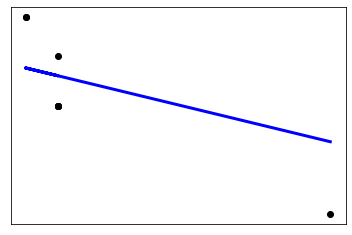

In [87]:
# Plot regression of testing set
plt.scatter(X_test, Y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

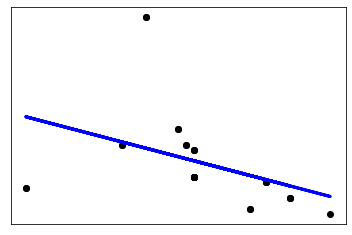

In [95]:
# plot linear regression of training set
# Plot outputs
plt.scatter(X_train, Y_train,  color='black')
plt.plot(X_train,y_pred2, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [70]:
##################################
#Try Logistic Regression##########
#####################################
anxiety_rating = pd.DataFrame(happy_anxiety['Anxiety_Avg_Rating'])
anxiety_rating.describe()

,Anxiety_Avg_Rating
count,37.000000
mean,2.850270
std,0.083782
min,2.630000
25%,2.820000
50%,2.840000
75%,2.910000
max,3.010000


In [19]:
anxiety_rating['Anxiety_Avg_Rating'] = anxiety_rating['Anxiety_Avg_Rating'].astype(float)

In [20]:
happy_rating = pd.DataFrame(happy_anxiety['Mean_Rating'])
happy_rating.describe()

,Mean_Rating
count,37.000000
mean,7.474324
std,0.082514
min,7.340000
25%,7.440000
50%,7.450000
75%,7.510000
max,7.750000


C:\Users\Wind\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

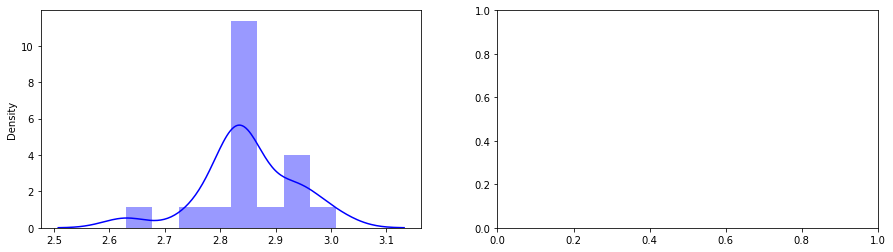

In [21]:
f, axes = plt.subplots(1,2,figsize=(15,4))
sns.distplot(anxiety_rating, kde=True,hist=True, color='b', ax=axes[0])


In [22]:
#Create only 2 categories for purpose of logistic regression
happy=[]
for rating in happy_anxiety['Mean_Rating']:
    if rating<7.45:
        happy.append('Below Avg Happy')
    #elif 7.45<=rating<7.46:
       # happy.append('Average Happy')
    else:
        happy.append('Avg or Higher than Average Happy')
        
categ_happy = pd.DataFrame(happy,columns=['Categories_Happy_Rating'])
categ_happy = pd.DataFrame(categ_happy['Categories_Happy_Rating'].astype('category'))
df1 = pd.concat([happy_anxiety,categ_happy],axis=1)
df1.head()


,Stations_x,Tmax,Tmin,AF,Rain,Sun,Tmean,Latitude,Longtitude,Low_0_4,...,Mean_Rating,Sample_Size_x,Area_Codes_y,Verylow_0_1,Low_2_3,Medium_4_5,High_6_10,Anxiety_Avg_Rating,Sample_Size_y,Categories_Happy_Rating
0,aberporth,12.888889,7.687302,1.115079,78.828175,126.252613,10.288095,52.139,-4.570,9.56,...,7.44,19540,W92000004,40.82,21.51,17.17,20.50,2.93,19540,Below Avg Happy
1,armagh,13.702381,6.274603,2.992063,69.495238,109.561508,9.988492,54.352,-6.649,6.76,...,7.75,2540,N92000002,42.61,23.85,16.02,17.52,2.78,2540,Avg or Higher than Average Happy
2,ballypatrick,11.864928,6.249531,1.625902,113.057143,NaN,9.057229,55.181,-6.153,6.76,...,7.75,2540,N92000002,42.61,23.85,16.02,17.52,2.78,2540,Avg or Higher than Average Happy
3,bradford,13.282143,6.448413,3.027778,74.966270,113.146429,9.865278,53.813,-1.772,10.21,...,7.41,13110,E12000003,40.84,21.46,16.43,21.27,2.96,13080,Below Avg Happy
4,braemar,10.984524,3.012169,8.515873,78.164815,94.156944,6.998347,57.006,-3.396,9.16,...,7.45,22760,S92000003,41.36,23.29,15.70,19.65,2.84,22740,Avg or Higher than Average Happy


In [26]:
le = preprocessing.LabelEncoder()

df2 = df1.copy()

df2['Happy Category Nr']= le.fit_transform(df1['Categories_Happy_Rating'])

In [129]:
from sklearn.ensemble import RandomForestRegressor

clf=RandomForestRegressor(n_estimators=100)

X_happy =df2[['Anxiety_Avg_Rating']]  # Features
y_happy =df2['Happy Category Nr']


In [ ]:
# Wihout reshape

In [130]:
X_train_happy, X_test_happy, y_train_happy, y_test_happy = train_test_split(X_happy, y_happy, test_size=0.2)
clf.fit(X_train_happy,y_train_happy)
y_pred_happy=clf.predict(X_test_happy)

# Model Accuracy, accuracy that the classifier can correctly predict the category of happy
print("Accuracy using Random Forest Classifier:",metrics.accuracy_score(y_test_happy, y_pred_happy))

Accuracy using Random Forest Classifier: 1.0


In [135]:
Xlog = df2['Anxiety_Avg_Rating'] # Features
Xlog.to_numpy()
ylog = df2['Happy Category Nr']# Target variable
ylog.to_numpy()

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0])

In [136]:
X_train_log,X_test_log,y_train_log,y_test_log=train_test_split(Xlog,ylog,test_size=0.20,random_state=0)
X_train_log = X_train_log.values.reshape(-1,1)
y_train_log = y_train_log.values.reshape(-1,1)

In [137]:
from sklearn.linear_model import LogisticRegression

# 
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train_log,y_train_log.ravel())




LogisticRegression()

In [138]:

X_test_log = X_test_log.values.reshape(-1,1)
y_test_log = y_test_log.values.reshape(-1,1)
y_pred_log=logreg.predict(X_test_log)

In [145]:
print("Accuracy:",metrics.accuracy_score(y_test_log, y_pred_log))
print("Precision:",metrics.precision_score(y_test_log, y_pred_log))
print("Recall:",metrics.recall_score(y_test_log, y_pred_log))
print('ROC_AUC_Score:',metrics.roc_auc_score(y_test_log, y_pred_proba))

Accuracy: 0.875
Precision: 0.0
Recall: 0.0
ROC_AUC_Score: 1.0


C:\Users\Wind\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [142]:
y_pred_log

array([0, 0, 0, 0, 0, 0, 0, 0])

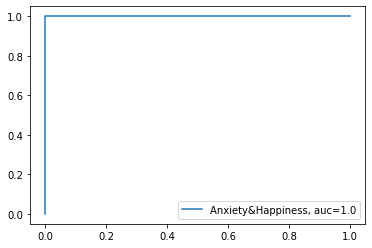

In [152]:
y_pred_pr = logreg.predict_proba(X_test_log)[::,1]
falpr, trupr, _ = metrics.roc_curve(y_test_log,  y_pred_pr)
AUC = metrics.roc_auc_score(y_test_log, y_pred_pr)
plt.plot(falpr,trupr,label="Anxiety&Happiness, auc="+str(AUC))
plt.legend(loc=4)
plt.show()